### Урок 2. Масштабирование признаков. Регуляризация. Стохастический градиентный спуск.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])

In [3]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

Нормализация [0, 1]

In [4]:
X[1].min(), X[1].max()

(0, 10)

In [5]:
X[2].min(), X[2].max()

(450, 2000)

In [6]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 5.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [7]:
X_norm[1] = (X[1] - X[1].min()) / (X[1].max() - X[1].min())
X_norm

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e-01, 1.00e-01, 2.00e-01, 5.00e-01, 3.00e-01, 0.00e+00,
        5.00e-01, 1.00e+00, 1.00e-01, 2.00e-01],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [8]:
X_norm[2] = (X[2] - X[2].min()) / (X[2].max() - X[2].min())
X_norm

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.1       , 0.1       , 0.2       , 0.5       , 0.3       ,
        0.        , 0.5       , 1.        , 0.1       , 0.2       ],
       [0.03225806, 0.16129032, 0.19354839, 0.09677419, 0.64516129,
        0.22580645, 0.67741935, 1.        , 0.        , 0.35483871],
       [1.        , 1.        , 2.        , 1.        , 2.        ,
        1.        , 3.        , 3.        , 1.        , 2.        ]])

Стандартизация

In [9]:
X_st = X.copy().astype(np.float64)
X1_mean = X[1].mean()
X1_std = X[1].std()
print(X1_mean, X1_std)

3.0 2.8284271247461903


In [10]:
X_st[1] = (X[1] - X1_mean) / X1_std
X_st

array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00],
       [-7.07106781e-01, -7.07106781e-01, -3.53553391e-01,
         7.07106781e-01,  0.00000000e+00, -1.06066017e+00,
         7.07106781e-01,  2.47487373e+00, -7.07106781e-01,
        -3.53553391e-01],
       [ 5.00000000e+02,  7.00000000e+02,  7.50000000e+02,
         6.00000000e+02,  1.45000000e+03,  8.00000000e+02,
         1.50000000e+03,  2.00000000e+03,  4.50000000e+02,
         1.00000000e+03],
       [ 1.00000000e+00,  1.00000000e+00,  2.00000000e+00,
         1.00000000e+00,  2.00000000e+00,  1.00000000e+00,
         3.00000000e+00,  3.00000000e+00,  1.00000000e+00,
         2.00000000e+00]])

In [11]:
def calc_std_fit(x):
    res = (x - x.mean()) / x.std()
    return res

In [12]:
# sklearn.StandartScaler() #Стандартизайия
# sklearn.MinMaxScaler() #Нормализация

In [13]:
X_st[2] = calc_std_fit(X[2])

In [14]:
X_st[3] = calc_std_fit(X[3])
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.70710678, -0.70710678, -0.35355339,  0.70710678,  0.        ,
        -1.06066017,  0.70710678,  2.47487373, -0.70710678, -0.35355339],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

SGD (Stochastic gradient descent)

In [15]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [16]:
def eval_model(X, y, iterations, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X.T)))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [17]:
eval_model(X_st, y, iterations=1000, alpha=1e-2)

100 [48.89624016  4.96321939  2.96790334  4.3788962 ] 87.05137951436791
200 [55.49159275  5.40473476  2.31769174  4.69216822] 27.18115680542268
300 [56.36626548  5.66785353  1.79306034  4.97836892] 25.710484526973595
400 [56.48226419  5.83878629  1.3789596   5.23903021] 25.421389081338596
500 [56.49764788  5.95413863  1.04893248  5.46665991] 25.245765607770483
600 [56.49968806  6.03493404  0.78406305  5.66057493] 25.130686806807226
700 [56.49995863  6.09349185  0.57044463  5.82326059] 25.05465164152751
800 [56.49999451  6.13719576  0.39757605  5.95842186] 25.004257729964742
900 [56.49999927  6.17059764  0.25735799  6.07000539] 24.970811077745005
1000 [56.4999999   6.19659842  0.14344243  6.16173965] 24.94859804897649


array([56.4999999 ,  6.19659842,  0.14344243,  6.16173965])

In [18]:
def eval_sgd_model(X, y, iterations, qty_in_batch, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    n_batch = n // qty_in_batch
    
    if n % qty_in_batch != 0:
        n_batch += 1
        
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)
#             print(b, n_batch, start_, end_)
            X_tmp = X[:, start_ : end_]
            y_tmp = y[start_ : end_]

            y_pred_tmp = np.dot(W, X_tmp)
            err = calc_mse(y_tmp, y_pred_tmp)

            W -= (alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T)))
        
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [19]:
eval_sgd_model(X_st, y, iterations=50000, qty_in_batch=4, alpha=1e-2)

5000 [56.51062031  6.3126911  -0.36443852  6.58449953] 11.289382317603774
10000 [56.51062035  6.31272262 -0.3645908   6.58462533] 11.28918200660118
15000 [56.51062035  6.31272262 -0.3645908   6.58462533] 11.289181999330403
20000 [56.51062035  6.31272262 -0.3645908   6.58462533] 11.289181999330424
25000 [56.51062035  6.31272262 -0.3645908   6.58462533] 11.289181999330424
30000 [56.51062035  6.31272262 -0.3645908   6.58462533] 11.289181999330424
35000 [56.51062035  6.31272262 -0.3645908   6.58462533] 11.289181999330424
40000 [56.51062035  6.31272262 -0.3645908   6.58462533] 11.289181999330424
45000 [56.51062035  6.31272262 -0.3645908   6.58462533] 11.289181999330424
50000 [56.51062035  6.31272262 -0.3645908   6.58462533] 11.289181999330424


array([56.51062035,  6.31272262, -0.3645908 ,  6.58462533])

L1 регуляризация

L2 регуляризация

In [20]:
# lambda = lambda_/2

In [21]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
#         if i % (iterations / 10) == 0:
#             print(i, W, err)
    return W

In [22]:
W = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)

In [23]:
W

array([56.49717514,  6.30231751, -0.35424091,  6.56978425])

In [24]:
eval_model(X_st, y, iterations=5000, alpha=1e-2)

500 [56.49767254  5.83477719  1.36781865  5.25424451] 25.41382962551479
1000 [56.4999999   6.17124081  0.25269258  6.07416416] 24.969784391475404
1500 [56.5         6.2575128  -0.13774522  6.39128671] 24.913059475565486
2000 [56.5         6.28678323 -0.27772011  6.50655795] 24.90571241785009
2500 [56.5         6.29722767 -0.32807425  6.54810646] 24.904760553791704
3000 [56.5         6.30098239 -0.34619733  6.56306445] 24.904637232271696
3500 [56.5         6.30233363 -0.3527205   6.5684486 ] 24.9046212549912
4000 [56.5         6.30281999 -0.35506846  6.57038658] 24.904619185007856
4500 [56.5         6.30299505 -0.35591359  6.57108415] 24.904618916825108
5000 [56.5         6.30305806 -0.35621778  6.57133523] 24.904618882079912


array([56.5       ,  6.30305806, -0.35621778,  6.57133523])

## Д/з

* **Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока). Сделайте вывод**

In [25]:
lambdas = np.linspace(1e-4, 100, 50)
Ws =  []
for l in lambdas:
    W = eval_model_reg2(X_st, y, iterations=1000, alpha=1e-2, lambda_=l)
    Ws.append(W)

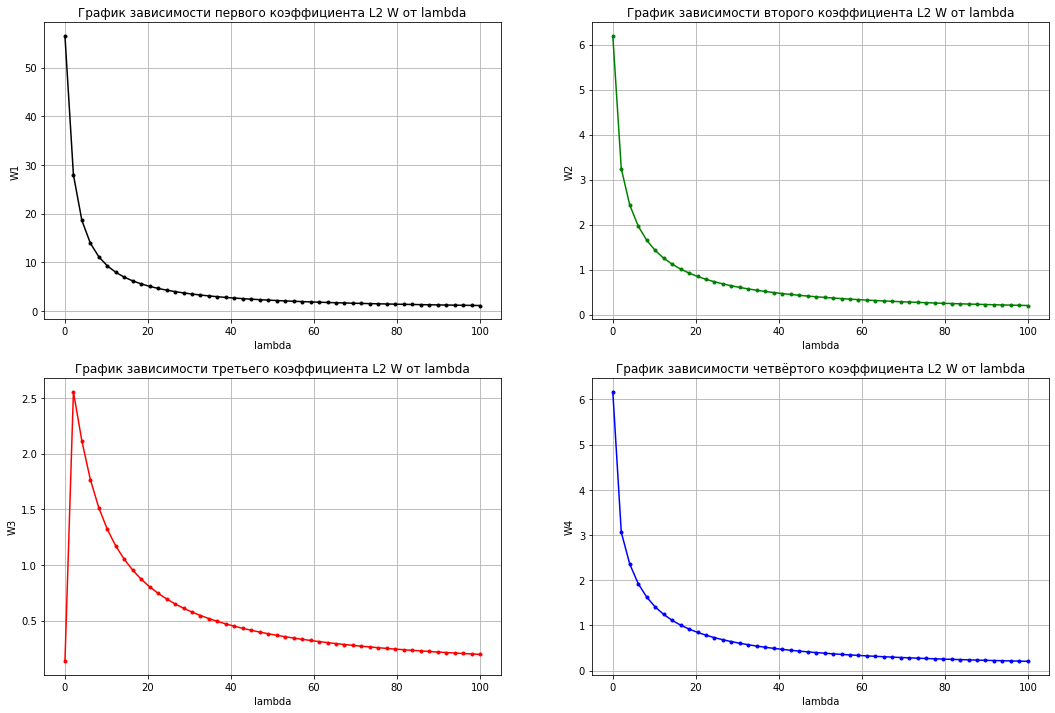

In [26]:
fig = plt.figure(figsize=(18, 12))

plt.subplot(221)
plt.plot(lambdas, [i[0] for i in Ws], 'ko-', markersize=3)
plt.grid(True)
plt.xlabel('lambda')
plt.ylabel('W1')
plt.title('График зависимости первого коэффициента L2 W от lambda')

plt.subplot(222)
plt.plot(lambdas, [i[1] for i in Ws], 'go-', markersize=3)
plt.grid(True)
plt.xlabel('lambda')
plt.ylabel('W2')
plt.title('График зависимости второго коэффициента L2 W от lambda')

plt.subplot(223)
plt.plot(lambdas, [i[2] for i in Ws], 'ro-', markersize=3)
plt.grid(True)
plt.xlabel('lambda')
plt.ylabel('W3')
plt.title('График зависимости третьего коэффициента L2 W от lambda')

plt.subplot(224)
plt.plot(lambdas, [i[3] for i in Ws], 'bo-', markersize=3)
plt.grid(True)
plt.xlabel('lambda')
plt.ylabel('W4')
plt.title('График зависимости четвёртого коэффициента L2 W от lambda')

plt.show()

Увеличение значения лямбды усиливает эффект регуляризации, веса приближаются к минимальным. Снижение значения лямбды приводит к более пологому графику.  
Если значение лямбда слишком большое, то появляется риск недообучения. Модель недостаточно обучается тренировочным данным, поэтому может плохо прогнозировать результаты.  
Если значение лямбда слишком маленькое, то увеличивается риск переобучения. Модель обучается излишним особенностям тренировочных данных и не может хорошо прогнозировать результаты на новых данных.  
Нужно тестировать разные значения лямбды и находить баланс между ними.

* **Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?**

Думаю, что можно, но нет смысла, так как применив после одного метода другой теряем признаки определённого метода: например при нормализации диапазон значений должен быть от 0 до 1, а при стандартизации совершенно другие требования, которые предполагают приближение данных к стандартному нормальному распределению.

* **Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.**

In [27]:
def eval_model_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
#         f(x, W) + (lambda_/2) * np.sum(np.abs(W))
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_/2 * np.sign(W))
    return W

In [28]:
W = eval_model_reg1(X_st, y, iterations=5000, alpha=1e-2)
W

array([56.5       ,  6.30306495, -0.3562511 ,  6.57136273])